In [1]:
import matplotlib.pyplot as plt
%matplotlib widget
import numpy as np
import scipy.fft
import soundfile as sf
import sounddevice as sd
import librosa.display
from spleeter.separator import Separator

# Using embedded configuration.
separator = Separator('spleeter:2stems-16kHz')
waveform, fs = sf.read('./data/song1.mp3') 

In [2]:
# Perform the separation :
prediction = separator.separate(waveform)
print("hello")

INFO:tensorflow:Using config: {'_model_dir': 'pretrained_models\\2stems', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.7
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use output_signature instead
Instructions for updating:
Use output_signature instead
INFO:tensorflow:Calling model_fn.
INFO:tensorfl

In [3]:
print(prediction)
sf.write('vocals/vocal1.wav',prediction['vocals'],fs)

{'vocals': array([[ 1.1215647e-05, -1.0977771e-05],
       [-1.2122629e-04, -1.7428779e-04],
       [-1.6175881e-04, -8.9497931e-05],
       ...,
       [-4.1504951e-05, -2.0874953e-05],
       [ 3.4137636e-05,  2.3351749e-05],
       [ 2.0226078e-05,  2.7284593e-06]], dtype=float32), 'accompaniment': array([[-0.00128237, -0.00060069],
       [-0.00180258, -0.00073427],
       [-0.00178499, -0.00070393],
       ...,
       [ 0.0020685 ,  0.00087177],
       [ 0.00242021,  0.00121558],
       [ 0.00169364,  0.00093469]], dtype=float32)}


In [4]:
from silero_vad import load_silero_vad, read_audio, get_speech_timestamps
model = load_silero_vad()
wav = read_audio('./vocals/vocal1.wav')
speech_timestamps = get_speech_timestamps(
  wav,
  model,
  return_seconds=True,  # Return speech timestamps in seconds (default is samples)
)
speech_timestamps

[{'start': 16.4, 'end': 16.9},
 {'start': 17.3, 'end': 19.0},
 {'start': 22.7, 'end': 23.2},
 {'start': 23.5, 'end': 24.2},
 {'start': 24.6, 'end': 26.3},
 {'start': 30.0, 'end': 32.1},
 {'start': 32.8, 'end': 35.3},
 {'start': 36.6, 'end': 40.7},
 {'start': 45.3, 'end': 46.1},
 {'start': 46.4, 'end': 47.9},
 {'start': 52.8, 'end': 53.5},
 {'start': 53.7, 'end': 55.4},
 {'start': 59.1, 'end': 59.8},
 {'start': 60.1, 'end': 61.9},
 {'start': 62.0, 'end': 64.2},
 {'start': 65.6, 'end': 66.9},
 {'start': 67.3, 'end': 69.9},
 {'start': 77.5, 'end': 82.1},
 {'start': 83.4, 'end': 84.4},
 {'start': 84.6, 'end': 85.1},
 {'start': 86.8, 'end': 87.3},
 {'start': 91.5, 'end': 95.8},
 {'start': 97.2, 'end': 101.2},
 {'start': 109.9, 'end': 110.2},
 {'start': 110.7, 'end': 113.2},
 {'start': 115.8, 'end': 116.5},
 {'start': 116.8, 'end': 117.5},
 {'start': 118.0, 'end': 119.5},
 {'start': 123.9, 'end': 125.1},
 {'start': 127.0, 'end': 127.4},
 {'start': 127.7, 'end': 128.8},
 {'start': 131.9, 'end

In [5]:
import crepe
from scipy.io import wavfile
import tensorflow as tf

sr, audio = wavfile.read('./vocals/vocal1.wav')
with tf.Graph().as_default():
    time, frequency, confidence, activation = crepe.predict(audio, sr, viterbi=True)

c:\Users\User\Desktop\projects\pitch-correction-analysis\.venv\lib\site-packages\keras\engine\training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [6]:
time, frequency, confidence, activation

(array([0.0000e+00, 1.0000e-02, 2.0000e-02, ..., 2.3046e+02, 2.3047e+02,
        2.3048e+02]),
 array([1086.67792049, 1078.09934501, 1052.81754496, ...,   32.40913441,
          32.50800969,   32.54202692]),
 array([0.01602348, 0.00285948, 0.00182952, ..., 0.07014474, 0.07520679,
        0.06913823], dtype=float32),
 array([[8.9833142e-05, 7.3075396e-05, 5.9634614e-05, ..., 2.3119738e-03,
         2.0839414e-03, 2.2028282e-03],
        [5.5489880e-05, 4.2199015e-05, 3.1724732e-05, ..., 1.5147562e-03,
         1.5243464e-03, 1.9842689e-03],
        [2.1189959e-05, 1.6822478e-05, 1.2890558e-05, ..., 9.0884900e-04,
         9.9602959e-04, 1.5388789e-03],
        ...,
        [3.1370926e-03, 4.7401111e-03, 4.8736874e-03, ..., 4.3847025e-03,
         4.2906459e-03, 3.9723814e-03],
        [1.1371528e-03, 1.7506618e-03, 1.9010694e-03, ..., 2.1196443e-03,
         2.1221018e-03, 2.3202333e-03],
        [2.2301136e-04, 3.5990129e-04, 4.2197297e-04, ..., 1.1353424e-03,
         1.0816096e-03, 1

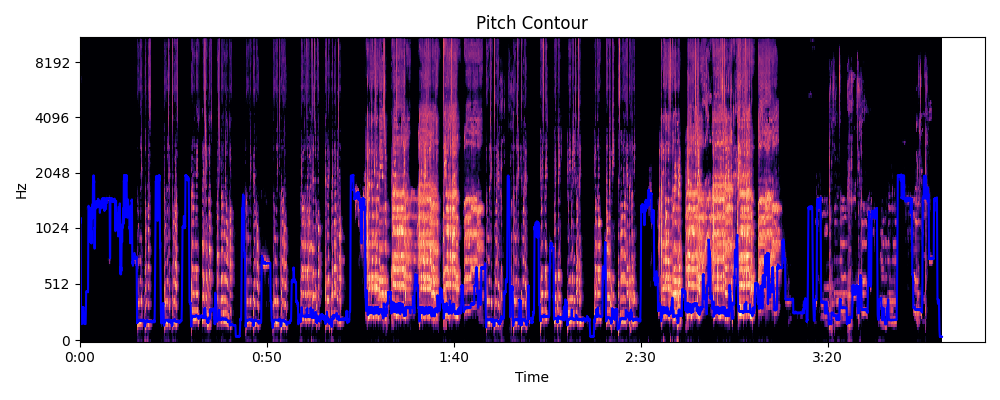

In [7]:
# Load the audio file
Y, fs = librosa.load('./vocals/vocal1.wav')

mel_spectrogram = librosa.feature.melspectrogram(y=Y, sr=fs)

# Pitch contour plot
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), sr=fs, hop_length=512, y_axis="mel", x_axis="time")
plt.plot(time, frequency, label='Pitch (Hz)', color='w')
#plt.xlabel('Time (s)')
#plt.ylabel('Frequency (Hz)')
plt.title('Pitch Contour')
#plt.legend()
#plt.grid(True)
plt.tight_layout()
plt.show()

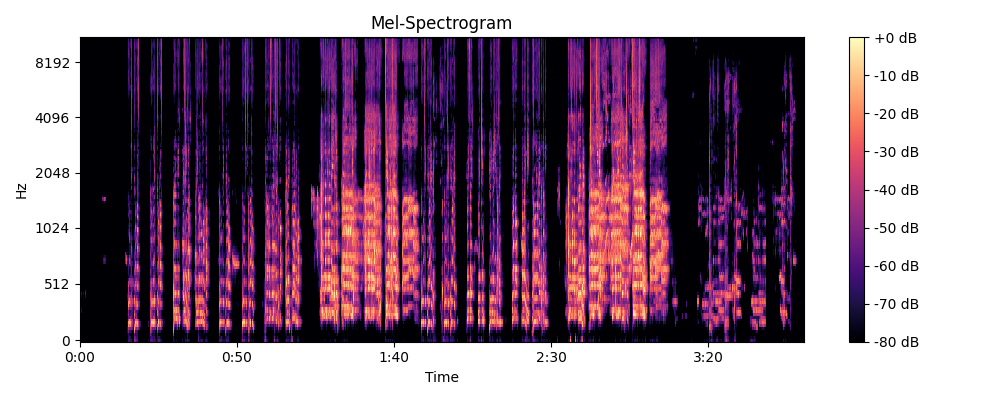

In [8]:
# Load the audio file
Y, fs = librosa.load('./vocals/vocal1.wav')

mel_spectrogram = librosa.feature.melspectrogram(y=Y, sr=fs)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), sr=fs, hop_length=512, y_axis="mel", x_axis="time")
plt.colorbar(format="%+2.0f dB")
plt.title("Mel-Spectrogram")
plt.tight_layout()
plt.show()